# 1. Problem statement

Task is to predict median house values in Californian districts, given a number of features from these districts.

## Dataset

Dataset is based on data from the 1990 California census.

# 2. Load data and basic libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##  Usefull functions

In [2]:
# To look at the score of cross-validation

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [3]:
filepath = 'housing.csv'
housing_data = pd.read_csv(filepath)
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district.

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are total 20640 rows (records) and 10 columns (attributes). 'total_bedrooms' column is missing some values.

'median_house_value' is the target attribute. 

'ocean_proximity' is the only non-float categorical attribute. Need to be converted into a numerical attribute.

In [5]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 3. Exploratory data analysis to gain insights

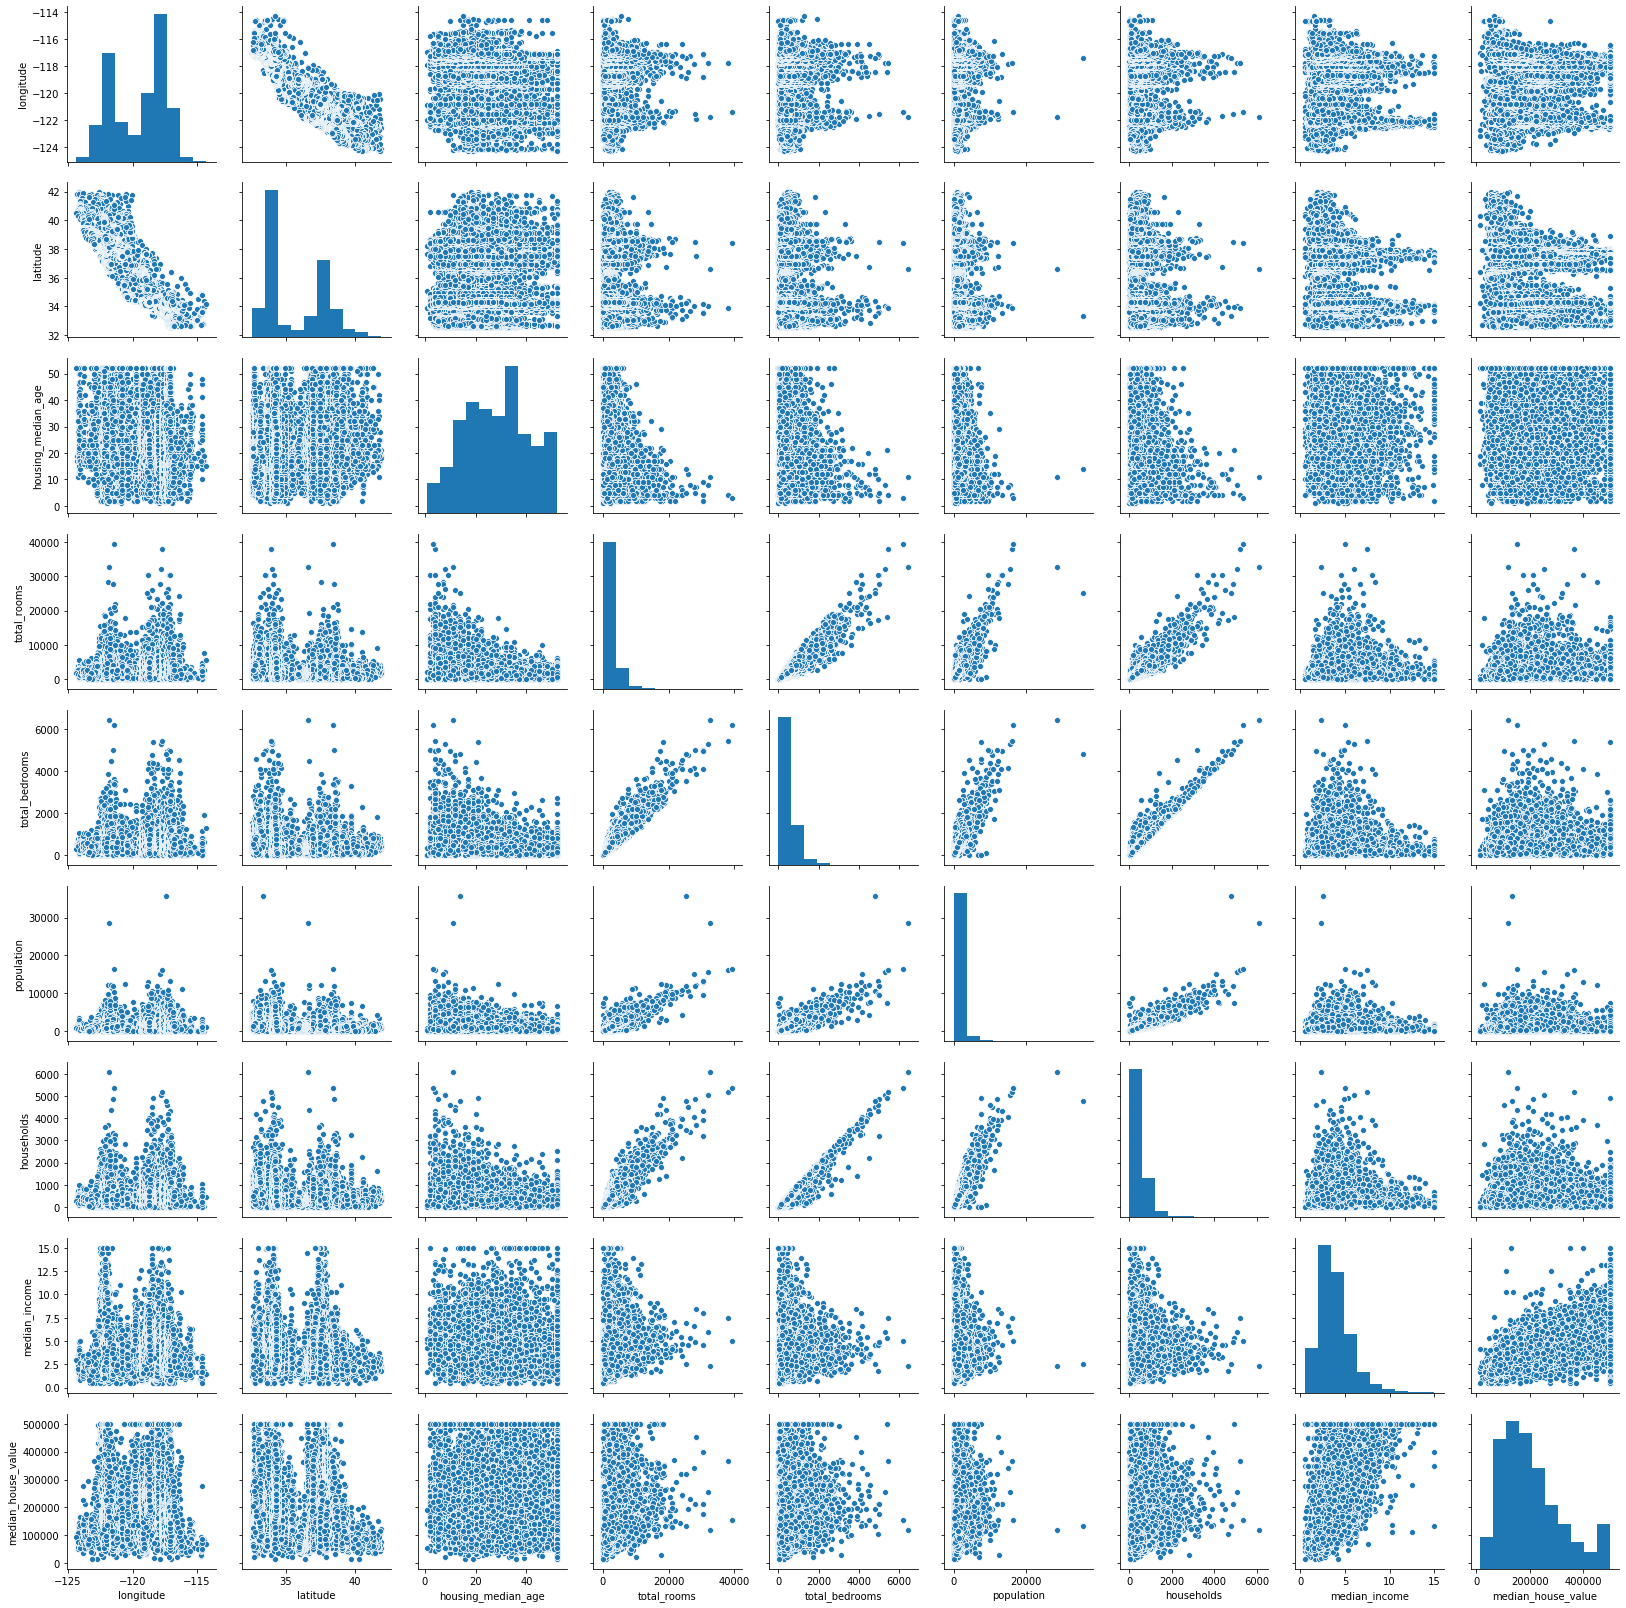

In [7]:
sns.pairplot(housing_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff375a5a7d0>,
      dtype=object)

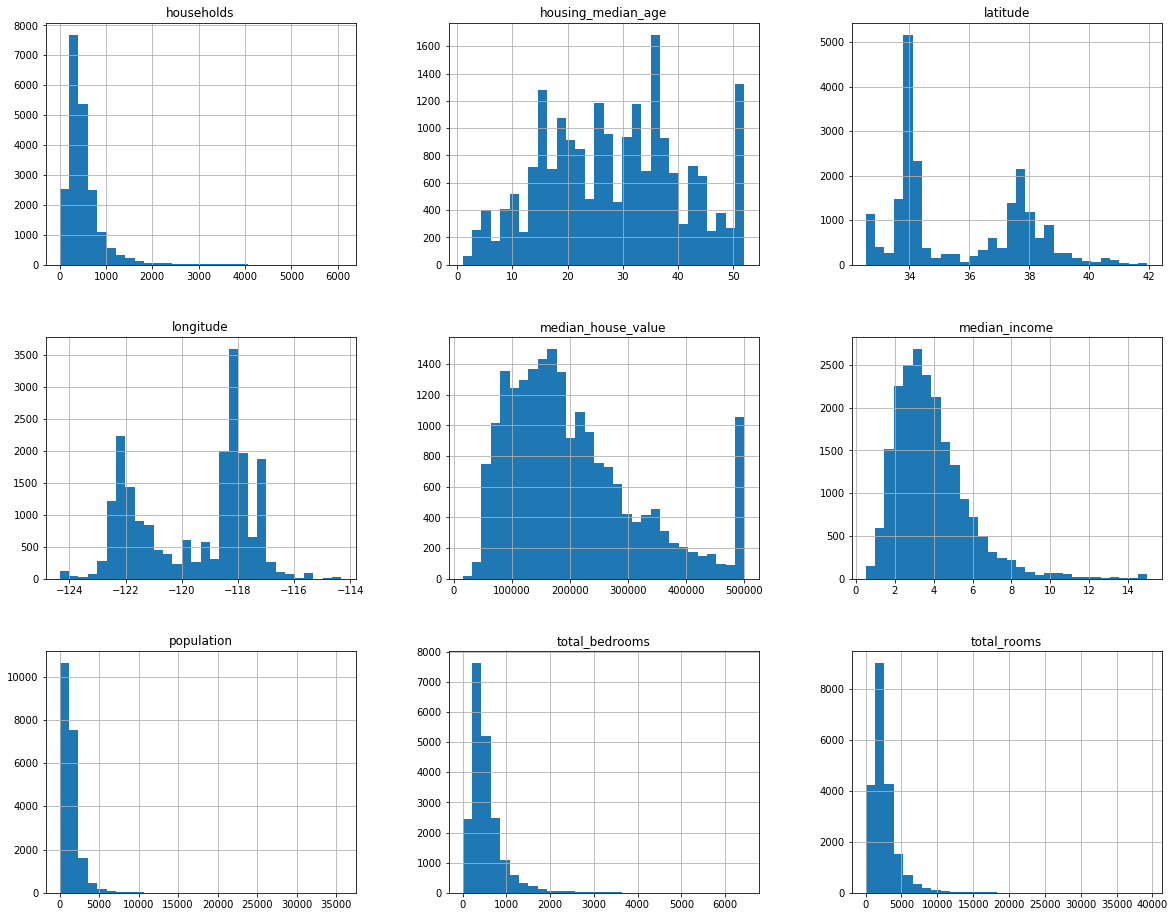

In [8]:
housing_data.hist(figsize=(20,16), bins=30)

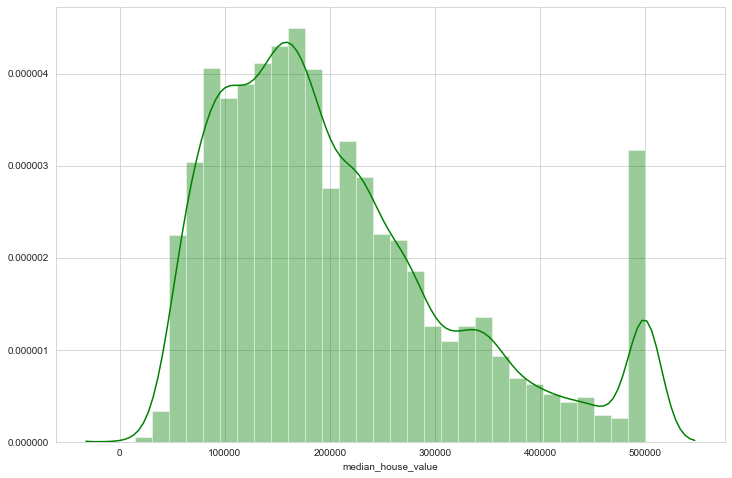

In [9]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.distplot(housing_data['median_house_value'], color='g',bins=30)

'median_house_value' seems to be capped at 500000 value.

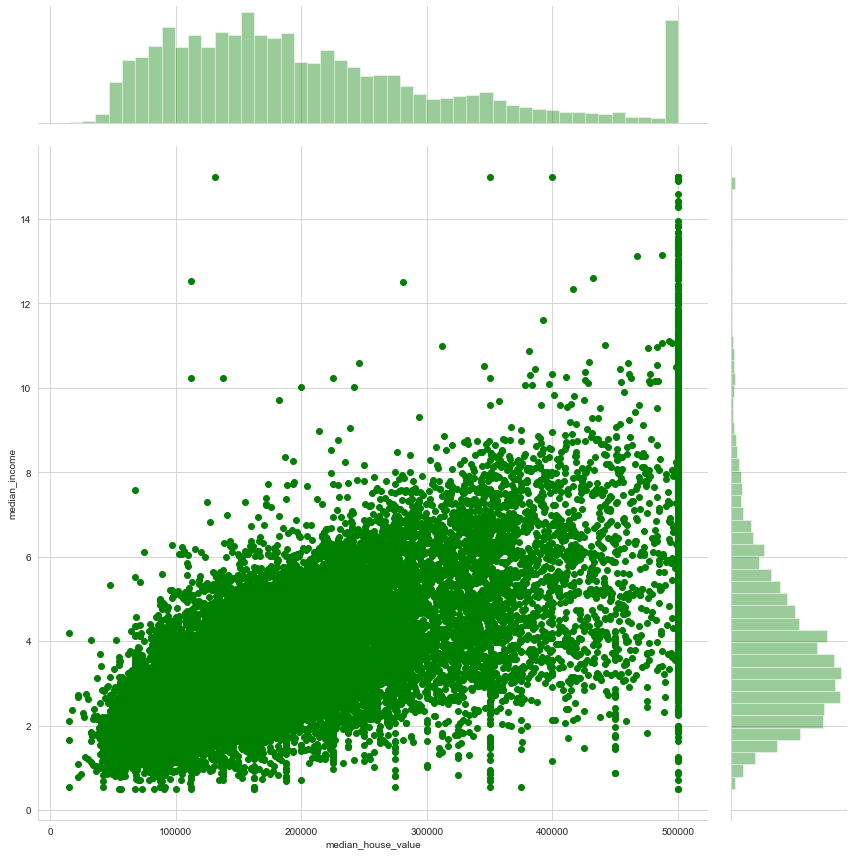

In [10]:
sns.jointplot(x='median_house_value', y='median_income', data=housing_data, kind='scatter', height=12, color='g',)

As expected there is some definite correlation between 'median_house_value' and 'median_income' attributes.

Also 'median_income' distribution is right-skewed with a very long tail. It may require capping.

## Scatterplot to depict ocean_proximity

Plot resembles the map of California

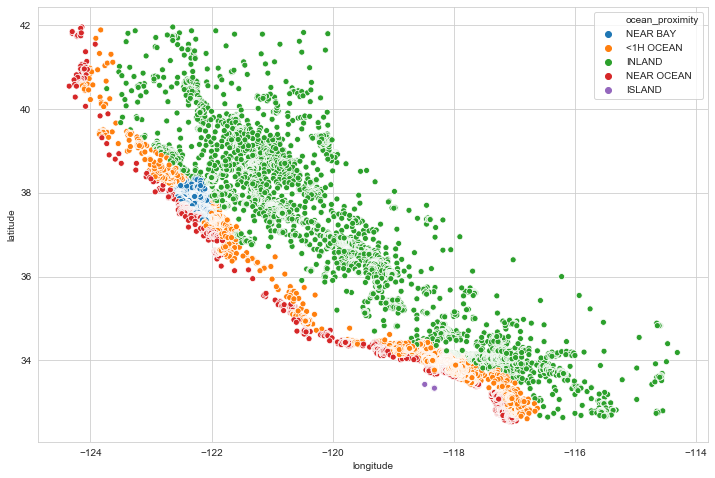

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=housing_data, x='longitude', y='latitude',hue='ocean_proximity')

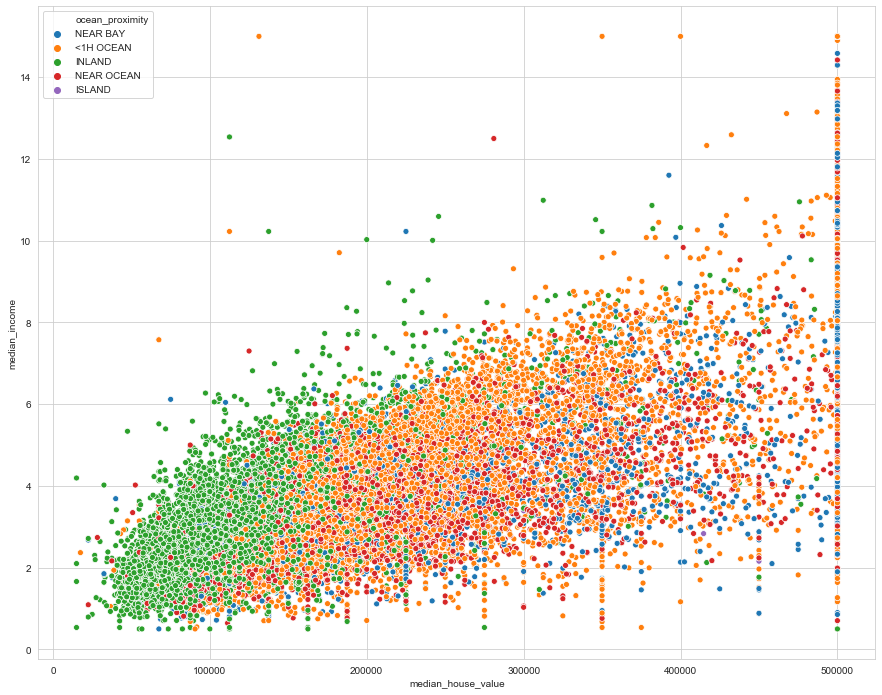

In [12]:
plt.figure(figsize=(15,12))
sns.scatterplot(data = housing_data, x='median_house_value', y='median_income', hue='ocean_proximity')

'Inland'(green) houses have lower median_house_value in general.

In [13]:
housing_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [14]:
housing_data.corr()['median_house_value'].sort_values(ascending=True)

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

'median_house_value' has strongest correlation with 'median_income' and a lesser degree correlation with 'latitude', 'housing_median_age' and 'total_rooms'. Feature engineering may be required.

## Generating heatmap and clustermap of correlation between attributes

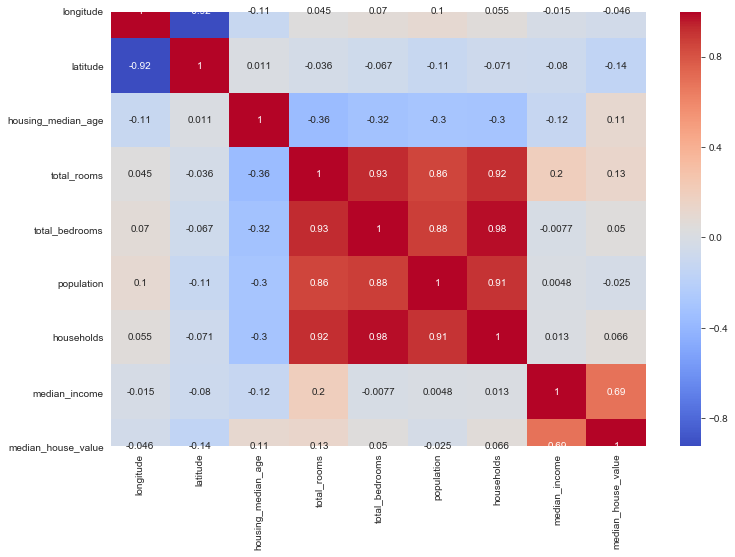

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(housing_data.corr(), cmap='coolwarm', annot=True)

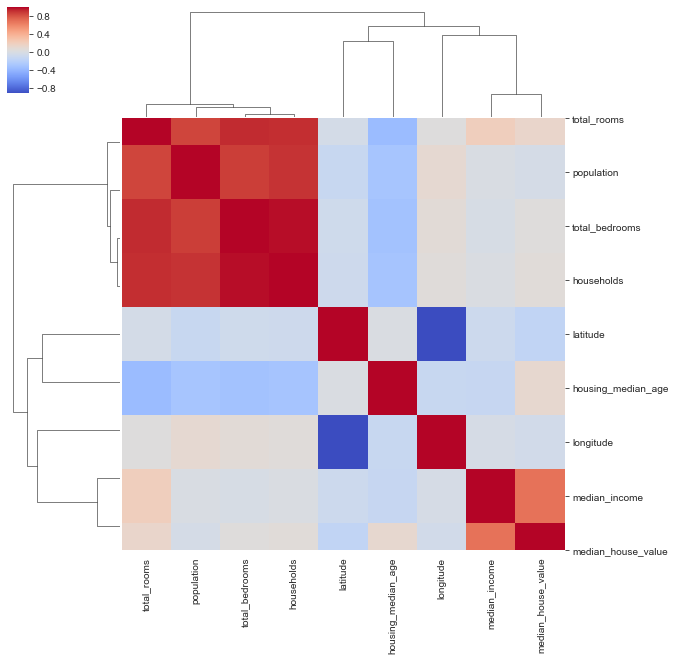

In [16]:
sns.clustermap(housing_data.corr(), cmap='coolwarm')

# 4. Preparing data for ML

## Dropping rows with missing values 

In [17]:
housing_data = housing_data.dropna()
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Converting categorical feature into numerical

In [18]:
housing_final = pd.get_dummies(housing_data, columns=['ocean_proximity']).astype(np.float64)
housing_final.shape

(20433, 14)

## Creating new attributes from existing ones

In [19]:
housing_final['rooms_per_household'] = housing_final['total_rooms']/housing_final['households']
housing_final['bedrooms_per_room'] = housing_final['total_bedrooms']/housing_final['total_rooms']

## Creating new attribute 'income_categ' for Stratified sampling of training and test set

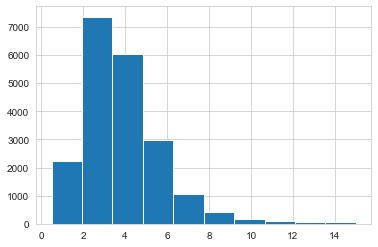

In [20]:
housing_data['median_income'].hist()

In [21]:
# Divide by 1.5 to limit the number of income categories
# Round up using ceil to have discrete categories

housing_data['income_categ'] = np.ceil(housing_data['median_income']/1.5)
housing_data['income_categ'].where(housing_data['income_categ']<5,5.0,inplace=True)

housing_data['income_categ'].value_counts()

3.0    7156
2.0    6515
4.0    3611
5.0    2337
1.0     814
Name: income_categ, dtype: int64

In [22]:
housing_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 16 columns):
longitude                     20433 non-null float64
latitude                      20433 non-null float64
housing_median_age            20433 non-null float64
total_rooms                   20433 non-null float64
total_bedrooms                20433 non-null float64
population                    20433 non-null float64
households                    20433 non-null float64
median_income                 20433 non-null float64
median_house_value            20433 non-null float64
ocean_proximity_<1H OCEAN     20433 non-null float64
ocean_proximity_INLAND        20433 non-null float64
ocean_proximity_ISLAND        20433 non-null float64
ocean_proximity_NEAR BAY      20433 non-null float64
ocean_proximity_NEAR OCEAN    20433 non-null float64
rooms_per_household           20433 non-null float64
bedrooms_per_room             20433 non-null float64
dtypes: float64(16)
memory usage: 2.7 MB


## Stratified Random Splitting of dataset into training and testing sets using 'income_categ'

Splitting done before any preprocessing to prevent any leakage of data.

In [23]:
X = housing_final.drop('median_house_value', axis=1)
y = housing_final['median_house_value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=housing_data['income_categ'])

X_train.shape

(16346, 15)

In [24]:
X_test.shape

(4087, 15)

## Scaling of features

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train,y_train)
scaler.transform(X_test)

array([[-1.24010282,  0.79591927, -0.68769969, ..., -0.38519751,
         0.3030966 , -0.70026741],
       [ 0.68136867, -0.86055054,  0.97618698, ...,  2.59607075,
        -0.36402255,  0.17437566],
       [ 0.72129535, -0.87458842,  0.65925619, ...,  2.59607075,
        -0.15791168, -0.0144772 ],
       ...,
       [ 0.52665278, -0.66869952,  0.58002349, ..., -0.38519751,
        -0.22196368,  0.05447814],
       [-0.90571687,  1.37615164,  0.97618698, ..., -0.38519751,
         0.84495294, -1.23833108],
       [ 0.59153364, -0.67337881, -0.76693239, ..., -0.38519751,
        -1.04518617,  2.61837847]])

# 5. Training using various algortihms to find a suitable model

## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg_predict = lin_reg.predict(X_train)

lin_rmse = np.sqrt(mean_squared_error(y_train,lin_reg_predict))
lin_rmse

68242.41630438887

In [27]:
lin_scores = cross_val_score(lin_reg,X_train,y_train, cv=10, scoring='neg_mean_squared_error')
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [69820.77180639 64553.044465   68292.60869174 70130.94375139
 65826.40570441 70898.14596957 74525.66560781 66232.65603123
 67265.06251417 67603.1611389 ]
Mean: 68514.84656806196
Standard deviation: 2769.508555758699


## Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

dt_reg_predict = dt_reg.predict(X_train)

dt_rmse = np.sqrt(mean_squared_error(y_train,dt_reg_predict))
dt_rmse

0.0

In [29]:
scores = cross_val_score(dt_reg,X_train,y_train, scoring='neg_mean_squared_error', cv=10)
dt_rmse_scores = np.sqrt(-scores)

display_scores(dt_rmse_scores)

Scores: [74390.59081145 64459.58301321 68593.58745479 69497.88849215
 69652.43862847 69406.45019457 70856.83220705 69927.28829572
 70051.07632236 68865.75132943]
Mean: 69570.14867491988
Standard deviation: 2299.077558433036


## Random Forest Regression

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [31]:
rf_scores = cross_val_score(rf_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)

display_scores(rf_rmse_scores)

Scores: [53905.42207354 47417.41025432 49582.99868122 53843.69305177
 48530.15597929 54327.49325271 52639.99107302 51918.35484927
 51297.93972804 52250.80495642]
Mean: 51571.42638995997
Standard deviation: 2246.4237519397484


## SVR

In [32]:
from sklearn.svm import SVR

sv_reg = SVR()
sv_reg.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
sv_scores = cross_val_score(sv_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
sv_rmse_scores = np.sqrt(-sv_scores)

display_scores(sv_rmse_scores)

Scores: [120425.44496865 116533.37783735 119191.43944312 118235.17351391
 116050.48724036 122284.09266524 116393.69210597 117622.22934457
 120666.35712043 120316.36199736]
Mean: 118771.86562369557
Standard deviation: 2022.444359212078


## XGBoost Regressor

In [34]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [35]:
from xgboost.sklearn import XGBRegressor

xgb_reg = XGBRegressor(random_state=42, silent=True )
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [36]:
xgb_scores = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
xgb_rmse_scores = np.sqrt(-xgb_scores)

display_scores(xgb_rmse_scores)

Scores: [56880.11606775 52021.67237381 53747.05289137 57239.5843239
 53808.16427553 58389.5916814  56196.36523317 53423.33713199
 54721.0157657  55570.91470913]
Mean: 55199.781445375746
Standard deviation: 1892.6831630836832


# Fine tuning model

## Fine tuning Rnadom Forest Regression with RandomizedSearchCV

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_ditrib_rf = { 
    'n_estimators': randint(low=1, high=500),
    'max_features': randint(low=1, high=8),
    'max_depth' : randint(low=1, high=8)
}

rand_search_rf = RandomizedSearchCV(rf_reg, param_ditrib_rf, scoring='neg_mean_squared_error', verbose=5, n_jobs=-1)
rand_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.7s finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_st...


In [38]:
rf_predictions = rand_search_rf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

64598.32492225319

## Fine tuning XGBoost Regression with GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

params = {
    'colsample_bytree':[0.6,0.7,0.8],
    'gamma':[0.03,0.1,0.3],
    'min_child_weight':[11],
    'learning_rate':[0.1],
    'max_depth':[6],
    'n_estimators':[1000],
    'subsample':[0.8,]
}

In [40]:
grid_search = GridSearchCV(xgb_reg, params, scoring='neg_mean_squared_error', verbose=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  3.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_sta...
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8],
                         'gamma': [0.03, 0.1, 0.3], 'learning_rate': [0.1],
                         'max_depth': [6], 'mi

In [41]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.03,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=11, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=0.8, verbosity=1)

In [42]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,27.994556,0.113399,0.631153,0.029724,0.6,0.03,0.1,6,11,1000,0.8,"{'colsample_bytree': 0.6, 'gamma': 0.03, 'lear...",-2.085908e+09,-2.230757e+09,-2.197811e+09,-2.171490e+09,6.199528e+07,1
1,27.165108,0.566005,0.634391,0.024912,0.6,0.1,0.1,6,11,1000,0.8,"{'colsample_bytree': 0.6, 'gamma': 0.1, 'learn...",-2.085908e+09,-2.230757e+09,-2.197811e+09,-2.171490e+09,6.199528e+07,1
2,26.969739,0.289217,0.571931,0.078329,0.6,0.3,0.1,6,11,1000,0.8,"{'colsample_bytree': 0.6, 'gamma': 0.3, 'learn...",-2.085908e+09,-2.230757e+09,-2.197811e+09,-2.171490e+09,6.199528e+07,1
3,28.909625,0.014853,0.572456,0.010318,0.7,0.03,0.1,6,11,1000,0.8,"{'colsample_bytree': 0.7, 'gamma': 0.03, 'lear...",-2.119125e+09,-2.217046e+09,-2.203897e+09,-2.180021e+09,4.339523e+07,4
4,29.399153,0.088044,0.531408,0.054566,0.7,0.1,0.1,6,11,1000,0.8,"{'colsample_bytree': 0.7, 'gamma': 0.1, 'learn...",-2.119125e+09,-2.217046e+09,-2.203897e+09,-2.180021e+09,4.339523e+07,4
5,29.479044,0.056592,0.480307,0.032871,0.7,0.3,0.1,6,11,1000,0.8,"{'colsample_bytree': 0.7, 'gamma': 0.3, 'learn...",-2.119125e+09,-2.217046e+09,-2.203897e+09,-2.180021e+09,4.339523e+07,4
6,32.864553,0.080502,0.467682,0.009893,0.8,0.03,0.1,6,11,1000,0.8,"{'colsample_bytree': 0.8, 'gamma': 0.03, 'lear...",-2.117971e+09,-2.211498e+09,-2.233445e+09,-2.187635e+09,5.007063e+07,7
7,32.732834,0.095715,0.486809,0.023722,0.8,0.1,0.1,6,11,1000,0.8,"{'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...",-2.117971e+09,-2.211498e+09,-2.233445e+09,-2.187635e+09,5.007063e+07,7
8,26.654415,0.924728,0.358480,0.043719,0.8,0.3,0.1,6,11,1000,0.8,"{'colsample_bytree': 0.8, 'gamma': 0.3, 'learn...",-2.117971e+09,-2.211498e+09,-2.233445e+09,-2.187635e+09,5.007063e+07,7


In [43]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.03,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 11,
 'n_estimators': 1000,
 'subsample': 0.8}

In [44]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [45]:
best_model = grid_search.best_estimator_

final_predictions = best_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

45715.373099208715

## Best model is XGBoost 

# Importance of features in predicting housing price

In [46]:
feature_importance = grid_search.best_estimator_.feature_importances_
attributes = X.columns
sorted(zip(feature_importance, attributes), reverse=True)

[(0.4122198, 'ocean_proximity_INLAND'),
 (0.14329912, 'ocean_proximity_NEAR OCEAN'),
 (0.1032517, 'ocean_proximity_<1H OCEAN'),
 (0.10261517, 'median_income'),
 (0.0439183, 'longitude'),
 (0.034704175, 'ocean_proximity_NEAR BAY'),
 (0.03338065, 'latitude'),
 (0.032921094, 'bedrooms_per_room'),
 (0.026805153, 'housing_median_age'),
 (0.021994334, 'rooms_per_household'),
 (0.012498459, 'population'),
 (0.011279858, 'households'),
 (0.010881239, 'total_rooms'),
 (0.0102310395, 'total_bedrooms'),
 (0.0, 'ocean_proximity_ISLAND')]

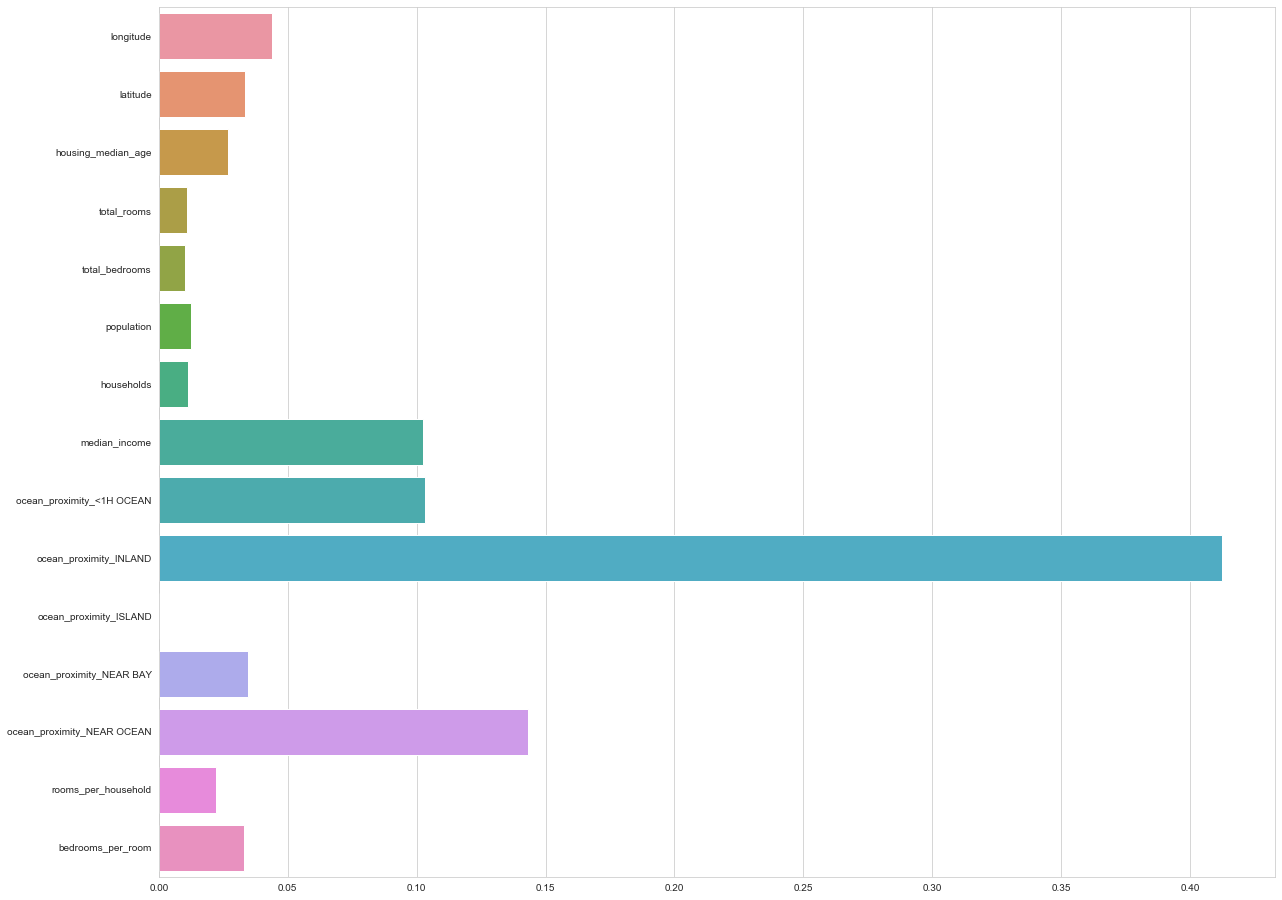

In [47]:
plt.figure(figsize=(20,16))
sns.barplot(x=feature_importance, y=attributes, orient='h')

# Saving model

In [48]:
from joblib import dump, load

dump(best_model, 'housing_price_pred.joblib') 

['housing_price_pred.joblib']